In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Step 1: Cloning and Building Darknet

# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# verify CUDA
!/usr/local/cuda/bin/nvcc --version

# make darknet (build)
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15442, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15442 (delta 1), reused 15 (delta 1), pack-reused 15424
Receiving objects: 100% (15442/15442), 14.07 MiB | 13.76 MiB/s, done.
Resolving deltas: 100% (10366/10366), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In funct

In [3]:
#Step 2: Download pretrained YOLOv3 weights

# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

--2022-07-04 02:47:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  46.2MB/s    in 5.5s    

2022-07-04 02:47:06 (43.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [4]:
#Step 3: Setting dataset configuration and training

#setting konfigurasi dataset
!cp /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/obj_1024.data /content/darknet/data/obj_1024.data
!cp /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/obj_1024.names /content/darknet/data/obj_1024.names
!cp /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/yolov3_custom_1024.cfg /content/darknet/cfg/yolov3_custom_1024.cfg
!unzip /content/drive/MyDrive/yoloshared/dataset/sawit200x200m_final_validation/obj.zip -d data/
!python /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/generate_train.py
!unzip /content/drive/MyDrive/yoloshared/dataset/sawit200x200m_final_validation/test.zip -d data/
!python /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/generate_test.py

#download pre-trained weights for the convolutional layers.
!wget http://pjreddie.com/media/files/darknet53.conv.74

#training configuration
#ubah save weights 1000 iterasi (line 386) dan chekpoint 2 iterasi (line 397)
!cp /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/detector.c /content/darknet/src/detector.c
# restart/make darknet (build)
!make

Archive:  /content/drive/MyDrive/yoloshared/dataset/sawit200x200m_final_validation/obj.zip
   creating: data/obj/
  inflating: data/obj/200x200m_101_1.jpg  
  inflating: data/obj/200x200m_101_1.txt  
  inflating: data/obj/200x200m_101_2.jpg  
  inflating: data/obj/200x200m_101_2.txt  
  inflating: data/obj/200x200m_101_3.jpg  
  inflating: data/obj/200x200m_101_3.txt  
  inflating: data/obj/200x200m_101_4.jpg  
  inflating: data/obj/200x200m_101_4.txt  
  inflating: data/obj/200x200m_106_10.jpg  
  inflating: data/obj/200x200m_106_10.txt  
  inflating: data/obj/200x200m_106_11.jpg  
  inflating: data/obj/200x200m_106_11.txt  
  inflating: data/obj/200x200m_106_2.jpg  
  inflating: data/obj/200x200m_106_2.txt  
  inflating: data/obj/200x200m_106_3.jpg  
  inflating: data/obj/200x200m_106_3.txt  
  inflating: data/obj/200x200m_106_5.jpg  
  inflating: data/obj/200x200m_106_5.txt  
  inflating: data/obj/200x200m_106_6.jpg  
  inflating: data/obj/200x200m_106_6.txt  
  inflating: data/obj/

In [5]:
#Step 6: run detections

# configuration custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom_1024.cfg
!sed -i 's/subdivisions=32/subdivisions=1/' yolov3_custom_1024.cfg
%cd ..

#configuration image.c
#hide class names and labels // line 436,438, 441-446
#configuration of thickness of the bounding box at line 369
!cp /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/image.c /content/darknet/src/image.c
# restart/make darknet (build)
!make

/content/darknet/cfg
/content/darknet
chmod +x *.sh
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image.c -o obj/image.o
./src/image.c: In function ‘draw_detections_v3’:
./src/image.c:440:21: warning: unused variable ‘j’ [-Wunused-variable]
                 int j;
                     ^
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o o

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1   1024 x1024 x   3 -> 1024 x1024 x  32 1.812 BF
   1 conv     64       3 x 3/ 2   1024 x1024 x  32 ->  512 x 512 x  64 9.664 BF
   2 conv     32       1 x 1/ 1    512 x 512 x  64 ->  512 x 512 x  32 1.074 BF
   3 conv     64       3 x 3/ 1    512 x 512 x  32 ->  512 x 512 x  64 9.664 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 512 x 512 x  64 0.017 BF
   5 conv    128       3 x 3/ 2    512 x 512 x  64 ->  256 x 256 x 128 9.664 BF
   6 conv     64       1 x 1/ 1    256 x 256 x 128 ->  256 x 256 x  64 1.074 BF
   7 conv    128       3 x 3/ 1    256 x 256 x  64 ->  256 x 256 x 128 9.664 BF
   8 Shortcut Layer: 5,  

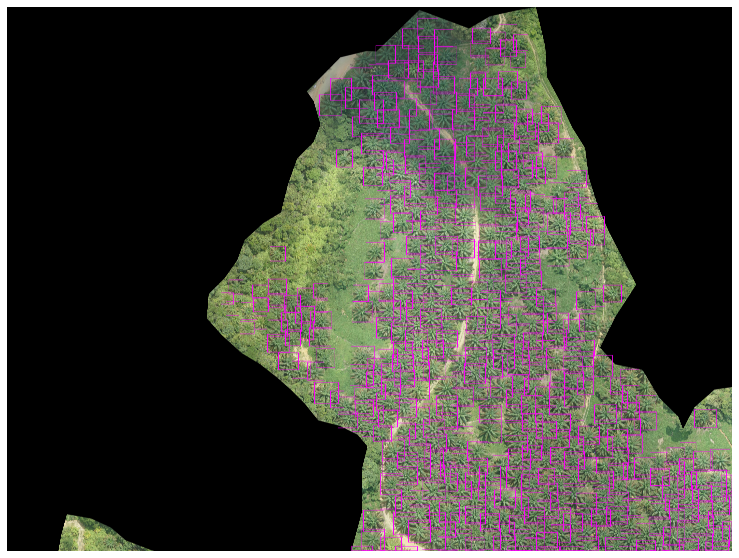

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
#run detector
!./darknet detector test data/obj_1024.data cfg/yolov3_custom_1024.cfg /content/drive/MyDrive/yoloshared/config/yolov3sawitconvo74/backup200x200m_final_random0_1024_validation/yolov3_custom_1024_8000.weights /content/drive/MyDrive/yoloshared/dataset/Test/final/400x300m_test1.jpg -thresh 0.4 -ext_output -dont_show -out result.json
imShow('predictions.jpg')
download('predictions.jpg')
download('result.json')